In [3]:
!unzip /home/uk/dev_ws/DeepLearning/kaggle/dogs-vs-cats.zip

Archive:  /home/uk/dev_ws/DeepLearning/kaggle/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [1]:
!unzip /home/uk/dev_ws/DeepLearning/kaggle/train2.zip

Archive:  /home/uk/dev_ws/DeepLearning/kaggle/train2.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  inflating

In [18]:
import os 

path = '../../data/1.20_data/train'
os.listdir(path)

['cat.2287.jpg',
 'cat.5048.jpg',
 'cat.12421.jpg',
 'cat.7739.jpg',
 'dog.8463.jpg',
 'dog.8630.jpg',
 'dog.7784.jpg',
 'dog.2727.jpg',
 'cat.7004.jpg',
 'cat.10802.jpg',
 'cat.6995.jpg',
 'dog.5043.jpg',
 'cat.1161.jpg',
 'dog.7306.jpg',
 'cat.10492.jpg',
 'dog.6741.jpg',
 'cat.3549.jpg',
 'cat.9580.jpg',
 'dog.9477.jpg',
 'cat.11786.jpg',
 'cat.3692.jpg',
 'dog.2539.jpg',
 'cat.1631.jpg',
 'cat.9365.jpg',
 'dog.9089.jpg',
 'dog.2276.jpg',
 'dog.11138.jpg',
 'dog.448.jpg',
 'cat.11970.jpg',
 'cat.7952.jpg',
 'dog.6539.jpg',
 'dog.4332.jpg',
 'cat.333.jpg',
 'dog.11513.jpg',
 'cat.11921.jpg',
 'dog.4257.jpg',
 'dog.11645.jpg',
 'dog.11013.jpg',
 'cat.11236.jpg',
 'dog.4589.jpg',
 'cat.6337.jpg',
 'dog.3302.jpg',
 'dog.11394.jpg',
 'cat.2190.jpg',
 'cat.8928.jpg',
 'cat.11061.jpg',
 'cat.2879.jpg',
 'dog.4625.jpg',
 'dog.240.jpg',
 'cat.9629.jpg',
 'cat.11946.jpg',
 'cat.2812.jpg',
 'dog.3383.jpg',
 'dog.5357.jpg',
 'dog.3613.jpg',
 'cat.8422.jpg',
 'dog.8349.jpg',
 'dog.8420.jpg',
 'd

In [19]:
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]            # ex) 고양이.12345.jpg                labels = 고양이  file_id = 12345

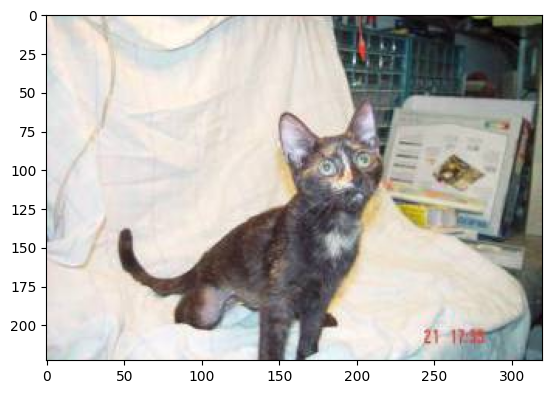

In [24]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
sample = random.choice(full_names)
image = mpimg.imread(path + '/' + sample)
plt.imshow(image)
plt.show()

In [26]:
sample = random.choice(full_names)
image = mpimg.imread(path +'/'+ sample)
image.shape

(357, 299, 3)

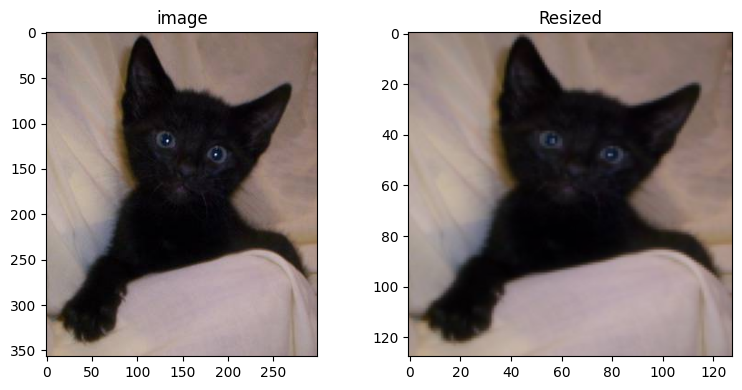

In [29]:
from skimage.transform import resize   # 이미지 크기 조절할때 사용
resized = resize(image, (128,128,3))

fig, axes = plt.subplots(1, 2, figsize=(8,4))   
ax = axes.ravel()

ax[0].imshow(image, cmap = plt.cm.gray)         
ax[0].set_title("image")                 #원본 이미지
ax[1].imshow(resized, cmap = plt.cm.gray)
ax[1].set_title("Resized")               # 조절 이미지

fig.tight_layout()
plt.show()

In [31]:
from tqdm.notebook import tqdm                             #tqdm은 반복문의 진행 상황을 시각적으로 보여준다.
from skimage.color import rgb2gray                         # 
import numpy as np

images = []
bar_total = tqdm(full_names)
for file in bar_total:
    image = mpimg.imread(path +'/'+ file)
    images.append(resize(image, (32, 32, 3)))
images = np.array(images)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [32]:
images.shape, labels[:3]

((25000, 32, 32, 3), ['cat', 'cat', 'cat'])

In [34]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([0, 0, 0]), array(['cat', 'dog'], dtype='<U3'))

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2 , random_state=13, stratify=labels_encoded)
X_train.shape, X_test.shape

((20000, 32, 32, 3), (5000, 32, 32, 3))

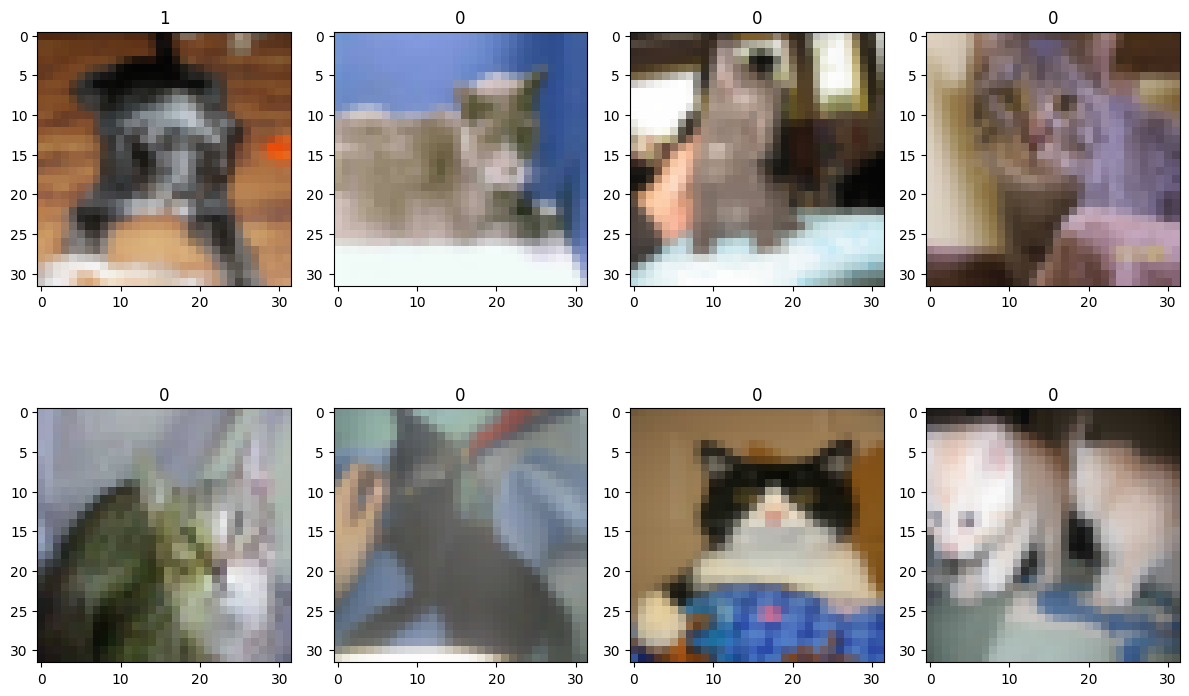

In [36]:
samples = random.choices(population=range(0, 20000), k=8)

plt.figure(figsize=(12,8))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx+1)             #그리드 생성
    plt.imshow(X_train[n], cmap='Greys',
               interpolation='nearest')
    plt.title(y_train[n])
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras import layers, models                                          # 컨볼루션 신경망 모델 구축하는 코드

model = models.Sequential([                                                         # 레이어를 순차적으로 쌓아서 모델을 구성하는 방법
    layers.Conv2D(32, kernel_size=(3,3), activation='relu',                          # 첫번째 레이어 32개의 필터 사용 
                  input_shape=(32,32,3)),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),                    # 이후부턴 64개의 필터 사용
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),                               # 훈련 과정에서 각 뉴런을 25% 확률로 비활성화 ( 과적합 방지용 )

    layers.Flatten(),
    layers.Dense(512, activation='relu'),               # 첫번째 완전 연결 레이어의 뉴런 개수
    layers.Dropout(0.25),
    layers.Dense(2, activation='softmax')
])

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,770 (1.35 MB)

 Trainable params: 352,770 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
import time

start_time = time.time()
hist = model.fit(X_train.reshape(20000, 32, 32, 3), y_train,
                 epochs= 10, verbose=1,
                 validation_data = (X_test.reshape(5000, 32, 32, 3), y_test))
print(time.time()-start_time)

2025-01-20 10:49:58.847477: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 245760000 exceeds 10% of free system memory.
2025-01-20 10:49:59.118224: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 245760000 exceeds 10% of free system memory.


Epoch 1/10


I0000 00:00:1737337801.487490   68182 service.cc:148] XLA service 0x7497b80052d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737337801.487920   68182 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-01-20 10:50:01.564810: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737337801.878650   68182 cuda_dnn.cc:529] Loaded cuDNN version 90300


 16/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4820 - loss: 0.7372  

I0000 00:00:1737337807.256167   68182 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5300 - loss: 0.6900

2025-01-20 10:50:10.755593: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.
2025-01-20 10:50:10.815708: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.5304 - loss: 0.6898 - val_accuracy: 0.6966 - val_loss: 0.5972
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6742 - loss: 0.6026 - val_accuracy: 0.7100 - val_loss: 0.5584
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7146 - loss: 0.5567 - val_accuracy: 0.7450 - val_loss: 0.5141
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7394 - loss: 0.5181 - val_accuracy: 0.7642 - val_loss: 0.4921
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7602 - loss: 0.4974 - val_accuracy: 0.7670 - val_loss: 0.4794
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7644 - loss: 0.4804 - val_accuracy: 0.7644 - val_loss: 0.4837
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7815 - loss: 0.4652 - val_accuracy: 0.7806 - val_loss: 0.4584
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7869 - loss: 0.4569 - val_accuracy: 0.7862 - va

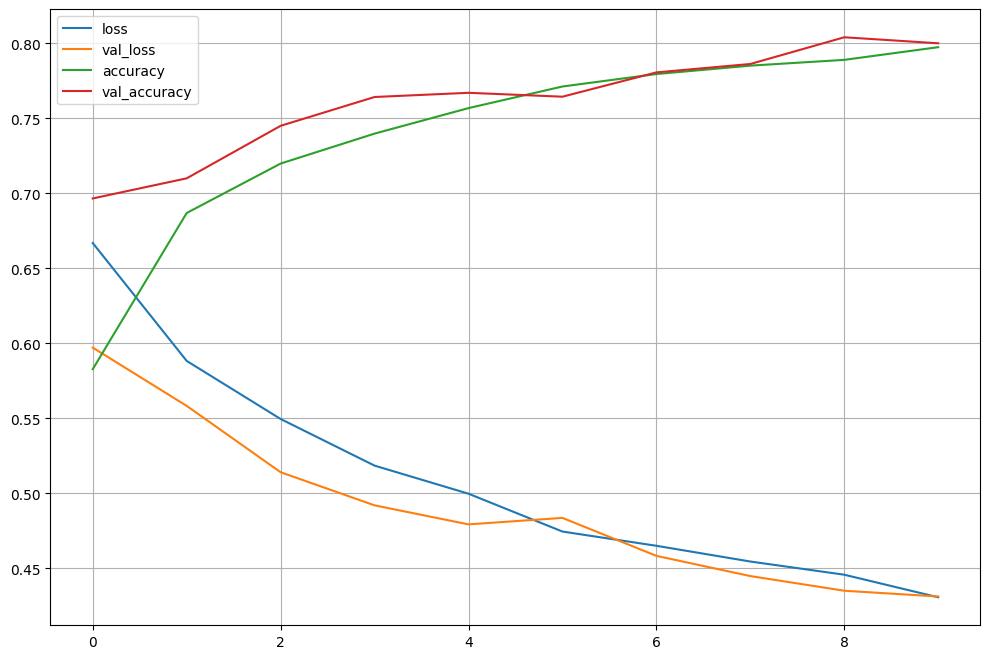

In [42]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label= each)

plt.legend()
plt.grid()
plt.show()

In [43]:
import os
import shutil

path = '../../data/1.20_data/train/'
classes = ['cat','dog']

for class_name in classes:
    class_path = os.path.join(path, class_name)
    os.makedirs(class_path, exist_ok=True)
    for file in full_names:
        if class_name in file:
            shutil.move(os.path.join(path, file), os.path.join(class_path, file))

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    validation_split = 0.2
)

In [46]:
batch_size = 32

train_generator = datagen.flow_from_directory(
    path,
    target_size=(128,128),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 20000 images belonging to 2 classes.


In [48]:
validation_generator = datagen.flow_from_directory(
    path,
    target_size =(128,128),
    batch_size = batch_size,
    class_mode = 'binary',
    subset='validation'
)

Found 5000 images belonging to 2 classes.


In [49]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu',                          # 첫번째 레이어 32개의 필터 사용 
                  input_shape=(128,128,3)),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),                    # 이후부턴 64개의 필터 사용
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),                               # 훈련 과정에서 각 뉴런을 25% 확률로 비활성화 ( 과적합 방지용 )

    layers.Flatten(),
    layers.Dense(512, activation='relu'),               # 첫번째 완전 연결 레이어의 뉴런 개수
    layers.Dropout(0.25),
    layers.Dense(2, activation='softmax')
])

/home/uk/venv/eda_venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size,
                 epochs= 5,
                 validation_data = validation_generator,
                 validation_steps = validation_generator.samples // batch_size)

Epoch 1/5


/home/uk/venv/eda_venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-01-20 11:34:03.837107: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 29491200 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 53ms/step - accuracy: 0.5523 - loss: 0.7225 - val_accuracy: 0.7298 - val_loss: 0.5495
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.7229 - loss: 0.5440 - val_accuracy: 0.7726 - val_loss: 0.4765
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.7787 - loss: 0.4664 - val_accuracy: 0.7997 - val_loss: 0.4381
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.8116 - loss: 0.4105 - val_accuracy: 0.8159 - val_loss: 0.4022
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.8318 - loss: 0.3688 - val_accuracy: 0.8299 - val_loss: 0.3869
